<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula02e_classifica%C3%A7%C3%A3o_eq_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.xlim(0, 1)
  plt.ylim(0, 1)


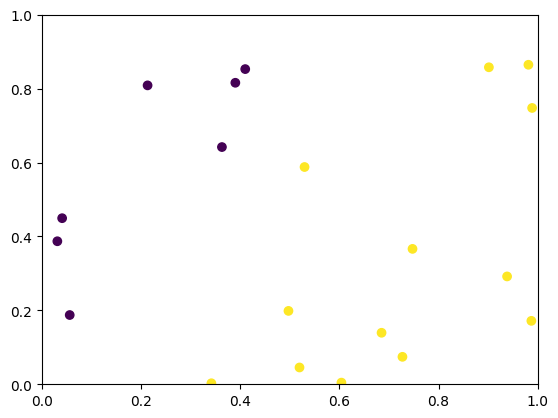

In [2]:
import numpy as np

def criaDataset(n=20, slop=[2,1], intercept=-0.4):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(slop) - [0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

X, y = criaDataset()
plotDataset(X, y)
plt.show()

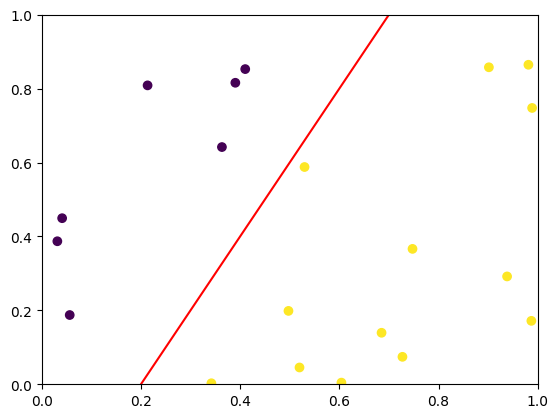

In [3]:
def plotHiperplano(vector, intercept=0):
  xs = np.array([0,1])
  ys = -(vector[0]*xs+intercept)/vector[1]
  plt.plot(xs, ys, 'r-')

plotDataset(X, y)
plotHiperplano([2, -1], -0.4)
plt.show()

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(a):
  return (a>=0)*2-1


[-0.47793874  2.48005598 -1.36718709]
1.0


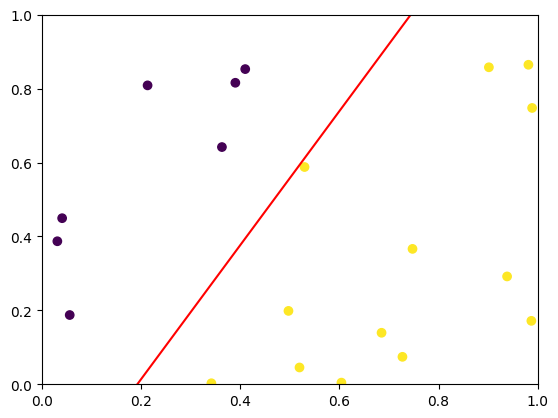

In [5]:
def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    Xb = include_bias(X)
    # equação normal
    self.w = np.linalg.pinv(Xb) @ y
    return self

  def predict(self, X):
    Xb = include_bias(X)
    return sign(Xb @ (self.w))

model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(model.w[1:], model.w[0])
plt.show()

0.983


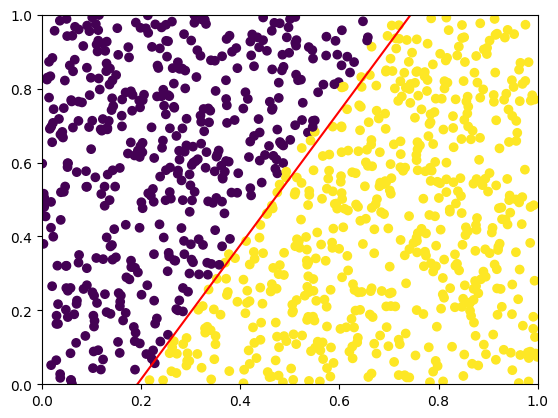

In [6]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(model.w[1:], model.w[0])
plt.show()

0.8095238095238095


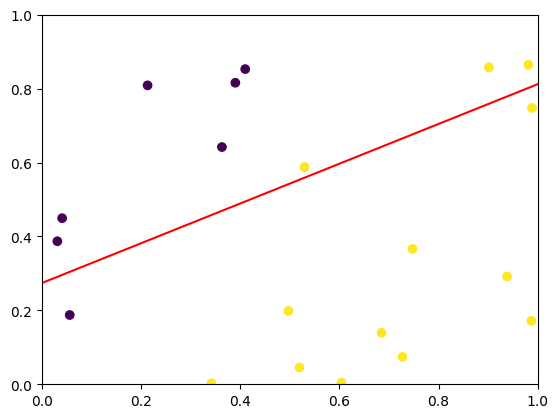

In [7]:
X_outlier = np.concatenate((X, np.array([[10,5]])))
y_outlier = np.concatenate((y, np.array([1])))
model = Perceptron()
model.fit(X_outlier, y_outlier)
ypred = model.predict(X_outlier)
print(accuracy_score(y_outlier, ypred))
plotDataset(X_outlier, y_outlier)
plotHiperplano(model.w[1:], model.w[0])
plt.show()

0.758


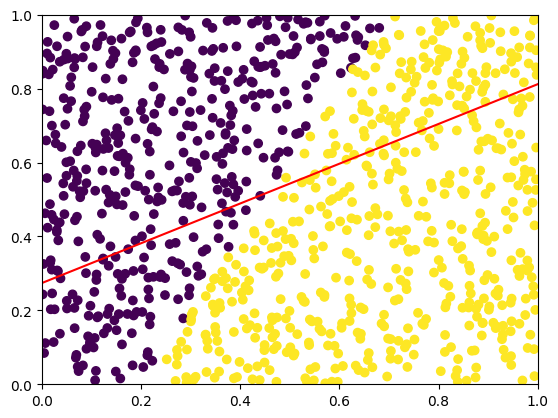

In [8]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(model.w[1:], model.w[0])
plt.show()